![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

# <font color='PURPLE'>Ciência dos Dados na Prática</font>

# <font color='GREY'> Aprovação de Financiamento Imobiliário</font>


![alt text](https://www.decorfacil.com/wp-content/uploads/2018/02/20180227casas-lindas-17.jpg)

#1° Problema de Negócio 
Precisamos construir uma Máquina Preditiva que, a partir de dados históricos de clientes, aprove ou não o crédito imobiliário ao cliente.



# 2° Análise Exploratória dos Dados

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score



In [28]:

# Import the adult.txt file into Python
data = pd.read_csv('/content/imobiliario.csv', sep=',')


In [ ]:
#Vendo os primeiros registros
data.head()

In [30]:
# informações do dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              32561 non-null  int64 
 1   empregador         32561 non-null  object
 2   renda              32561 non-null  int64 
 3   education          32561 non-null  object
 4   education_num      32561 non-null  int64 
 5   estado_civil       32561 non-null  object
 6   ocupacao           32561 non-null  object
 7   relacionamento     32561 non-null  object
 8   race               32561 non-null  object
 9   sex                32561 non-null  object
 10  investimentos      32561 non-null  int64 
 11  endividamento      32561 non-null  int64 
 12  horas_por_semana   32561 non-null  int64 
 13  nacionalidade      32561 non-null  object
 14  aprovacao_credito  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [31]:
#estatísticas descritivas das variáveis numéricas
data.describe()

,idade,renda,education_num,investimentos,endividamento,horas_por_semana
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [32]:
# Tabela de Frequencia do TARGET
data.aprovacao_credito.value_counts()

não aprovado    24720
APROVADO         7841
Name: aprovacao_credito, dtype: int64

In [33]:
#Tabela de Frequência da Variável
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
#Tabela de Frequência da Variável
data.nacionalidade.value_counts()

In [ ]:
#Tabela de Frequência da Variável
data.ocupacao.value_counts()

In [34]:
#Tabela de Frequência da Variável
data.estado_civil.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: estado_civil, dtype: int64

In [ ]:
#Tabela de Frequência da Variável
data.relacionamento.value_counts()

In [35]:
#Verifica campos com valores missing
data.isnull().sum()

idade                0
empregador           0
renda                0
education            0
education_num        0
estado_civil         0
ocupacao             0
relacionamento       0
race                 0
sex                  0
investimentos        0
endividamento        0
horas_por_semana     0
nacionalidade        0
aprovacao_credito    0
dtype: int64

In [ ]:
# verifica registros duplicados
data.duplicated().sum()

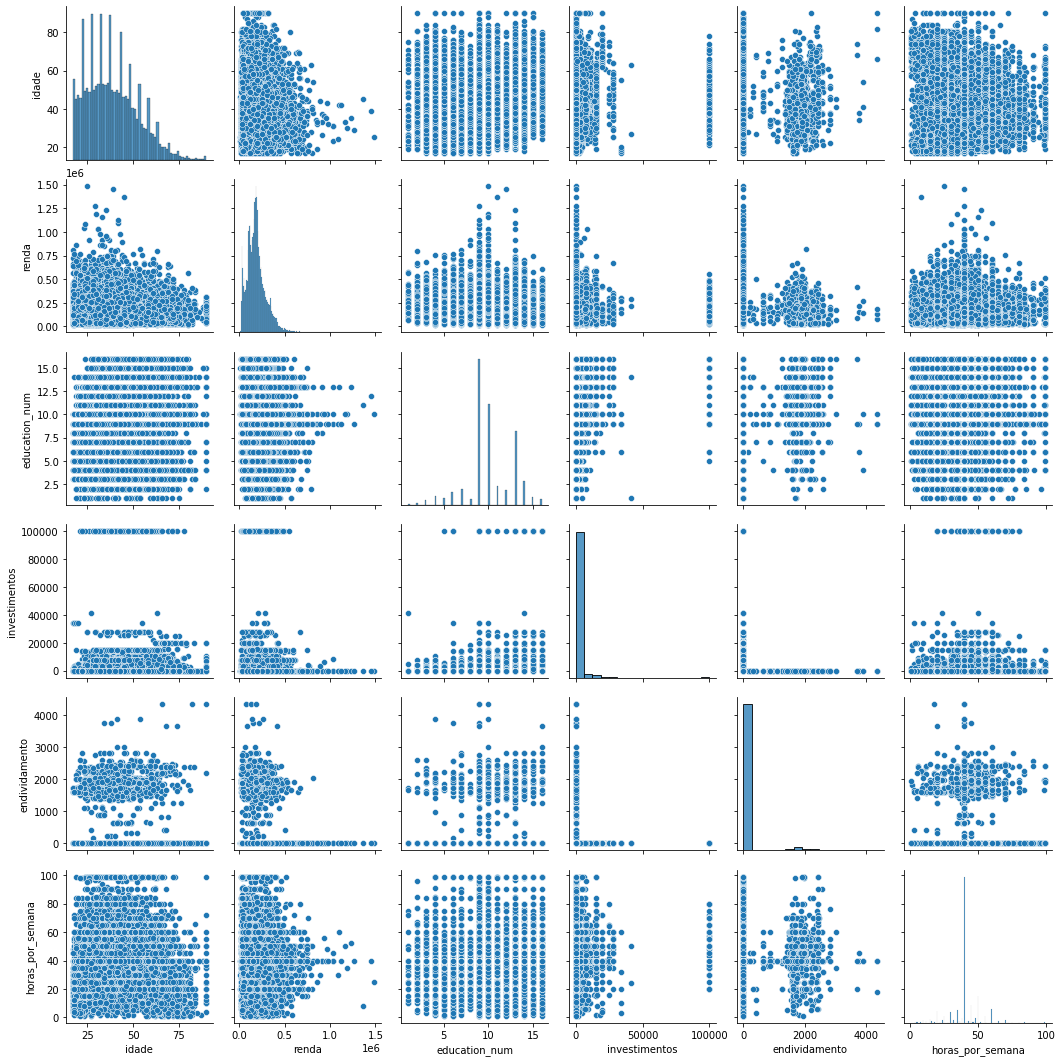

In [38]:
# Explorando a Visualização dos Dados
# Usar o Matplotlib
sns.pairplot(data)

#3° Pré-Processamento dos Dados

In [40]:
#Elimina registros duplicados
data.drop_duplicates(keep='first', inplace=True)
data
data.duplicated().sum()

0

In [41]:
# Convertendo campos strings em numéricos
for label in ['race', 'ocupacao','education','empregador','estado_civil','relacionamento','sex','nacionalidade']:
    data[label] = LabelEncoder().fit_transform(data[label])


In [42]:
# Separando as variáveis de entrada do algoritmo em "X"
X = data[['race', 'horas_por_semana', 'ocupacao', 'education', 'empregador','estado_civil','relacionamento','sex','nacionalidade']]


In [43]:
# Calcule a correlação entre as variáveis 
correlacoes = X.corr()


UsageError: unrecognized arguments: = "inline" )


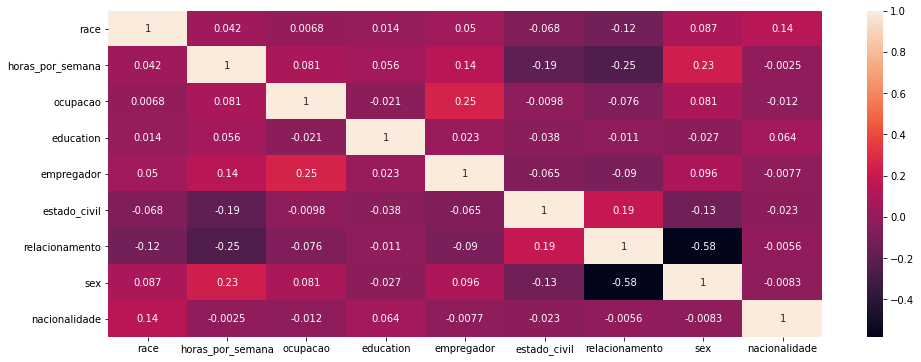

In [44]:
# Usando o método heatmap do seaborn
plt.figure(figsize=(16, 6))
sns.heatmap(data=correlacoes, annot=True)
%matplotlib (line = "inline")

In [45]:
# Separando a Variável Resposta /Target / Class / Label
Y = data['aprovacao_credito'].values.tolist()



In [ ]:
# Separando 30% dos registros para TESTE da Máquina Preditiva
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

#4° Máquina Preditiva Segmentação de Clientes

In [68]:
# Criando a Máquina Preditiva
#RandomForestClassifier(n_estimators=1000)
clf = XGBClassifier(n_estimators=1000 , learning_rate=0.01)

In [69]:
# Treinando a Máquina preditiva com dados de treino
clf = clf.fit(X_train, Y_train)
clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

#5° Avaliação da Máquina Preditiva

In [70]:
# Avaliando a Acurácia da Máquina Preditiva
accuracy = clf.score(X_test, Y_test)
print ('Acurácia: ' + str(accuracy))

#RF 0.8154066789592297
#XGB 0.8263675476336816


Acurácia: 0.8263675476336816


In [ ]:
# Avaliando a Cofusion Matrix e o Classification Report
prediction = clf.predict(X_test)
cm = confusion_matrix(prediction, Y_test)
print(cm)
cr = classification_report(prediction, Y_test)
print(cr)

  #RF não aprovado       0.88
  # XGB não aprovado     0.89

# **Resumão**

1. Conhecemos as Variáveis e o Que queremos Prever
2. Fizemos os tratamentos nos dados para....
3. Construir a Máquina preditiva com RF
4. Avaliamos a Máquina Preditiva e Criamos uma mais Potente
5. Finalizamos a Máquina com o XGBoost
6. Tunning de Hyperparâmetros

#Fim

## Valeu!

### #Links - Ciência dos Dados <a href="https://linktr.ee/cienciadosdados">https://linktr.ee/cienciadosdados</a>

### #YouTube - Mais Aulas como essa no YouTube <a href="https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s">https://www.youtube.com/watch?v=IaIc5oHd3II&t=1569s</a>

In [ ]:
from IPython.core.display import HTML
HTML('<iframe width="380" height="200" src="https://www.youtube.com/embed/q-7SbZpR1hQ" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')